<ipython-input-48-4192ca634936>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['y'] = df_filtered['y'].map({'yes': 1})


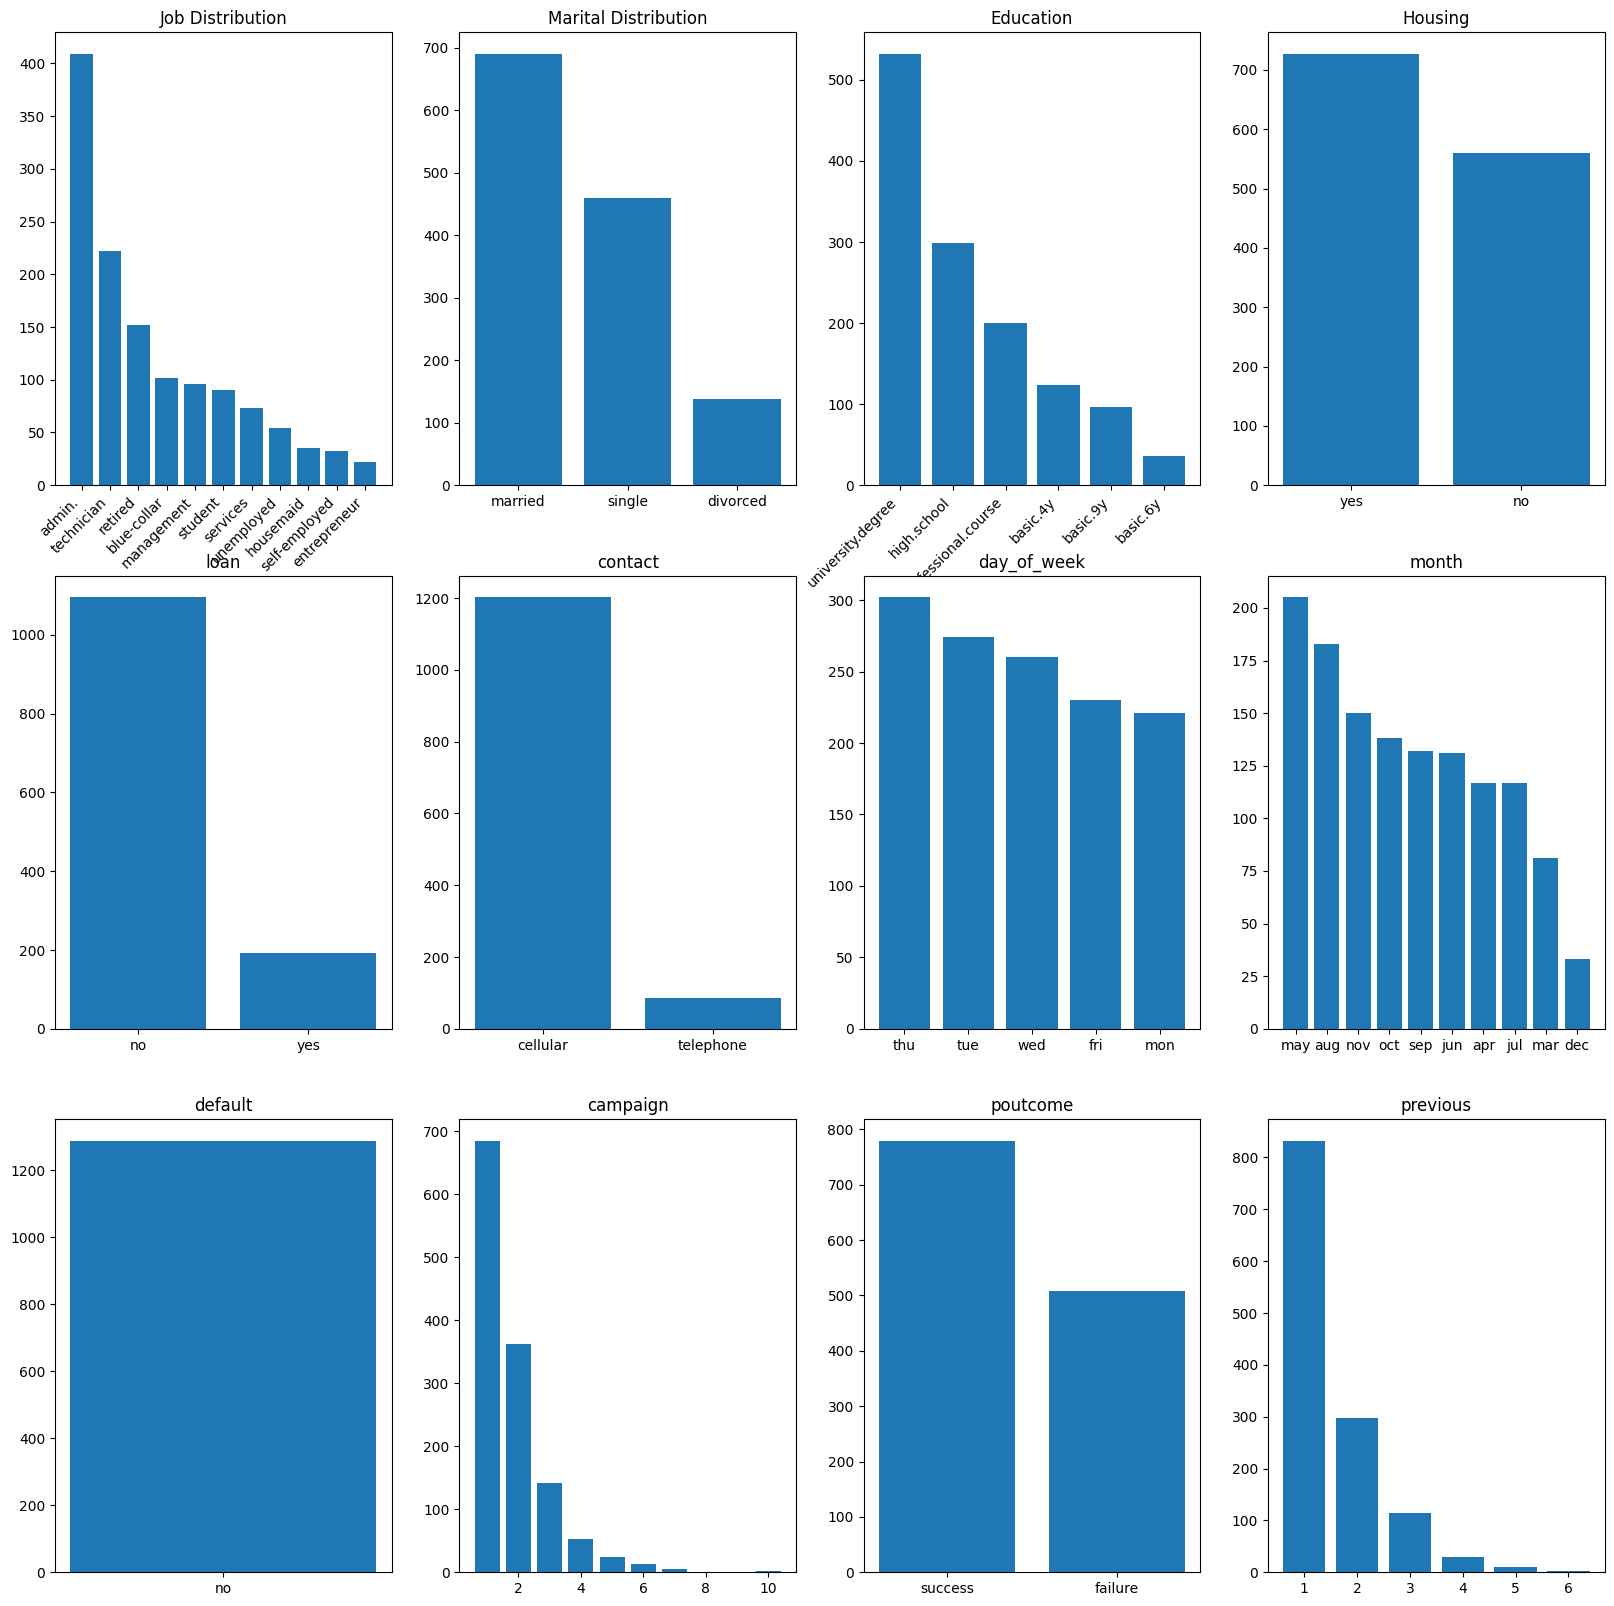

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
24019,40,services,married,high.school,no,yes,no,telephone,oct,tue,...,1,999,1,failure,-0.1,93.798,-40.4,4.968,5195.8,1
24102,36,admin.,married,high.school,no,yes,no,telephone,nov,wed,...,1,999,1,failure,-0.1,93.200,-42.0,4.286,5195.8,1
24379,42,admin.,married,high.school,no,no,no,cellular,nov,mon,...,2,999,1,failure,-0.1,93.200,-42.0,4.191,5195.8,1
24613,32,blue-collar,married,basic.9y,no,no,no,cellular,nov,mon,...,2,5,1,success,-0.1,93.200,-42.0,4.191,5195.8,1
24694,44,entrepreneur,married,university.degree,no,yes,no,cellular,nov,mon,...,2,999,1,failure,-0.1,93.200,-42.0,4.191,5195.8,1


<Figure size 640x480 with 0 Axes>

In [48]:
import pandas as pd
import seaborn as sns
import numpy as np
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, Lasso
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
import time
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings("ignore", category=UserWarning)


# Load dataset
df = pd.read_csv('bank-additional-full.csv', sep=';')
df.dropna()
# Replace 'Unknown' with NaN
df.replace('unknown', pd.NA, inplace=True)
# Drop rows with any NaN values
df.dropna(inplace=True)
# Replace 'nonexistent' with NaN
df.replace('nonexistent', pd.NA, inplace=True)
# Drop rows with any NaN values
df.dropna(inplace=True)
#df.drop('default', axis=1, inplace=True)

# Remove rows where 'col2' contains 'yes'
df_filtered = df[df['y'] != 'no']
df_filtered['y'] = df_filtered['y'].map({'yes': 1})

# Split the data
X=df_filtered.drop(columns=['y'])
y=df_filtered['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

df_filtered.head()
# Sample data
#categorical_columns = {'job': ['housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'management', 'entrepreneur', 'student', 'retired', 'unemployed'],
#        'marital': ['married', 'single', 'divorced'],
#        'education' : ['basic.4y', 'basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree', 'illeterate'],
#        'default' : ['no'],
#        'housing' : ['no', 'yes'],
#        'loan' : ['no', 'yes'],
#        'contact' : ['telephone', 'cellular'],
#        'day_of_week' : ['mon', 'tue', 'wed', 'thu', 'fri'],
#        'month' : ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
#        'poutcome' : ['failure', 'success'],
#        'y' : ['yes', 'no']
#           }

# Create a figure and a subplot

# Create subplots

# Create subplots
fig, axes = plt.subplots(3, 4, figsize=(20, 20))
ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12 = axes.flatten()

#Bar Plot of Job Distribution
ax1.bar(df_filtered['job'].value_counts().index, df_filtered['job'].value_counts().values)
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45, horizontalalignment='right')
ax1.set_title('Job Distribution')

# Bar Plot of Marital
ax2.bar(df_filtered['marital'].value_counts().index, df_filtered['marital'].value_counts().values)
ax2.set_title('Marital Distribution')

# Bar Plot of Education
ax3.bar(df_filtered['education'].value_counts().index, df_filtered['education'].value_counts().values)
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, horizontalalignment='right')
ax3.set_title('Education')

# Bar Plot of Housing
ax4.bar(df_filtered['housing'].value_counts().index, df_filtered['housing'].value_counts().values)
ax4.set_title('Housing')

# Bar Plot of Loan
ax5.bar(df_filtered['loan'].value_counts().index, df_filtered['loan'].value_counts().values)
ax5.set_title('loan')

# Bar Plot of Contact
ax6.bar(df_filtered['contact'].value_counts().index, df_filtered['contact'].value_counts().values)
ax6.set_title('contact')

# Bar Plot of Day of Contact
ax7.bar(df_filtered['day_of_week'].value_counts().index, df_filtered['day_of_week'].value_counts().values)
ax7.set_title('day_of_week')

# Bar Plot of Month of Contact
ax8.bar(df_filtered['month'].value_counts().index, df_filtered['month'].value_counts().values)
ax8.set_title('month')

# Bar Plot of Default
ax9.bar(df_filtered['default'].value_counts().index, df_filtered['default'].value_counts().values)
ax9.set_title('default')

# Bar Plot of Campaign
ax10.bar(df_filtered['campaign'].value_counts().index, df_filtered['campaign'].value_counts().values)
ax10.set_title('campaign')

# Bar Plot of poutcome
ax11.bar(df_filtered['poutcome'].value_counts().index, df_filtered['poutcome'].value_counts().values)
ax11.set_title('poutcome')

# Bar Plot of previous
ax12.bar(df_filtered['previous'].value_counts().index, df_filtered['previous'].value_counts().values)
ax12.set_title('previous')
plt.show()

#Save the plot
plt.savefig('bar_plot_subscribed_yes.png')
df_filtered.head()


0.49052396416664124
0.8280032249395324
0.8464017185821697
